In [2]:
using CSV
using DataFrames
using LinearAlgebra
using Plots
using YAML

In [3]:
# Load the parquet file using Arrow
# particles = DataFrame(Arrow.Table("particles.parquet"))

particles = CSV.read("particles.csv", DataFrame)

Row,shower,pdg,kinetic_energy,x,y,z,time,weight
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,0,22,2.68063,-2511.15,5536.2,0.0,1.13973e-5,1.0
2,0,22,1.16594,-1897.83,3594.58,0.0,1.55407e-5,1.0
3,0,22,1.69784,-1689.12,3238.18,0.0,1.28297e-5,1.0
4,0,22,8.22074,-1520.27,2680.62,0.0,1.60523e-5,1.0
5,0,22,1.2727,-1450.41,2461.66,0.0,1.68368e-5,1.0
6,0,22,1.35689,-2470.07,5260.24,0.0,5.77628e-6,1.0
7,0,22,1.16295,-2714.79,5966.96,0.0,7.03563e-6,1.0
8,0,22,1.04626,-2740.38,6047.79,0.0,7.90808e-6,1.0
9,0,22,6.21258,-1973.2,4061.56,0.0,1.15843e-5,1.0


In [1]:
println(particles)

UndefVarError: UndefVarError: `particles` not defined

In [6]:
# Define the vectors and rotation matrix
normal_vector = [0.45217398524533681, -0.3661629880519191, 0.81330397346148509]
x_axis = [0.0, -0.91184756344828699, -0.41052895273466672]
y_axis = [0.89192975455881607, 0.18563051261662877, -0.41231374670066206]

3-element Vector{Float64}:
  0.8919297545588161
  0.18563051261662877
 -0.41231374670066206

In [7]:
rotation_matrix = hcat(x_axis, y_axis, normal_vector)

# Add a 'z' column initialized to 0
particles[!, :z] = zeros(size(particles, 1))

2171-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [8]:
# Extract the columns as vectors and stack them into a matrix
coords = hcat(particles.x, particles.y, particles.z)'

# Apply the rotation matrix
rotated_positions = rotation_matrix * coords

# Assign the rotated positions back to the DataFrame
particles.x = rotated_positions[1, :]
particles.y = rotated_positions[2, :]
particles.z = rotated_positions[3, :]

2171-element Vector{Float64}:
 -1251.7517847346417
  -702.9784074801104
  -641.7146527540975
  -481.1403534948788
  -419.53926941634046
 -1154.8317054911847
 -1345.7615518850046
 -1368.5805492201946
  -864.5820318934468
  -844.4866459675403
     ⋮
  -825.953025254293
  -911.7377190569742
  -909.4108375132186
  -742.31053806163
  -889.5489367117476
  -837.6869710578461
  -920.8803900706249
 -1047.3012092427334
  -866.0201235698406

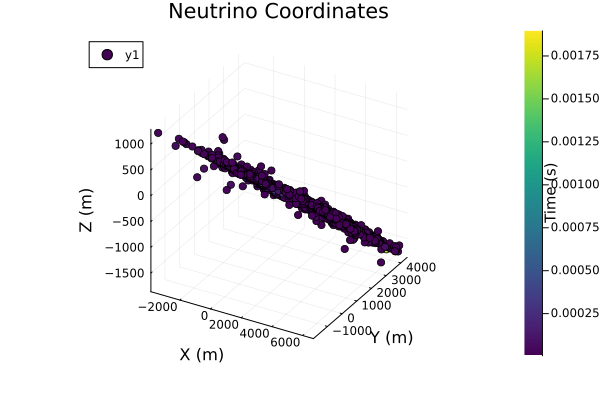

In [19]:
 # Required for plotting
plot1 = scatter3d(particles.x, particles.y, particles.z, xlabel="X (m)", ylabel="Y (m)", zlabel="Z (m)", 
                  title="Neutrino Coordinates", marker_z=particles.time, color=:viridis, colorbar=true, 
                  colorbar_title="Time (s)")

In [10]:
# Save the plot
# savefig("neutrino_coordinates_plot.png")